# Black-hole binary formation channels with gaussian mixtures

Many problems in astrophysics give rise to data with multiple modes. This is typically because different processes physical processes contribute to the observed dataset.  

For instance, one of the most outstanding question in gravitational-wave astrophysics is the formation channel of binary black holes. Leading scenarions include the evolution of isolated binaries in the galactic field and the dynamica assembly of sources in dense environments like globular clusters.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import norm

# Dataset

By going through the dataset, i can see at least 3 models by eye:


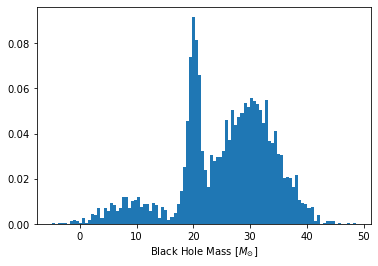

In [2]:
data = np.load('formationchannels.npy')
plt.hist(data, bins=100, density=True)
print('By going through the dataset, i can see at least 3 models by eye:')
plt.xlabel('Black Hole Mass [$M_{\odot}$]')
plt.show()

In [3]:
data

array([[17.12172682],
       [ 5.94121793],
       [ 6.35914124],
       ...,
       [34.34170191],
       [30.27018478],
       [25.93264098]])

You first need to define the model (instance of a class), and then train it on the data using the fit method (the data provided are already in the right numpy format!). This will output the trained model, which has various attributes.

# $N = 1, ..., 10$ Gaussians fit

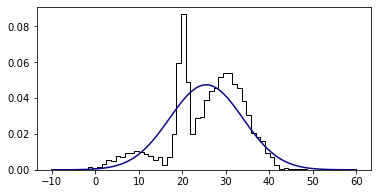

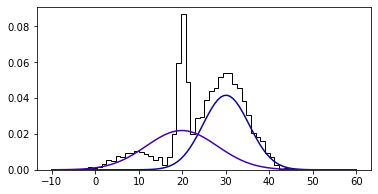

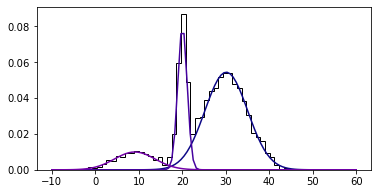

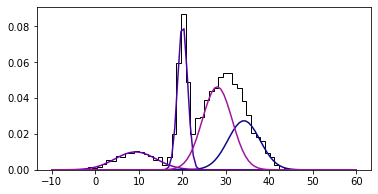

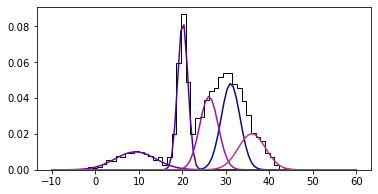

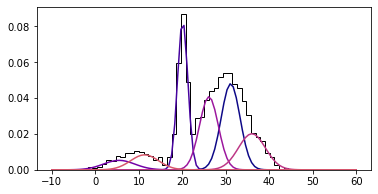

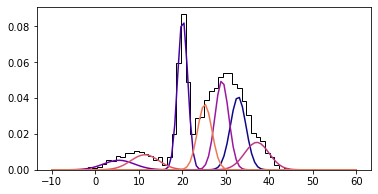

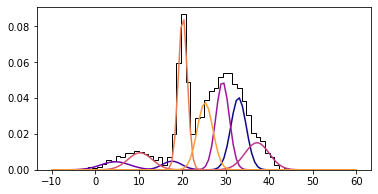

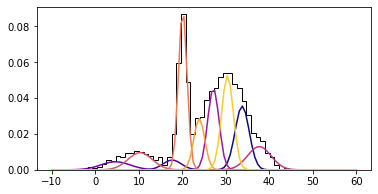

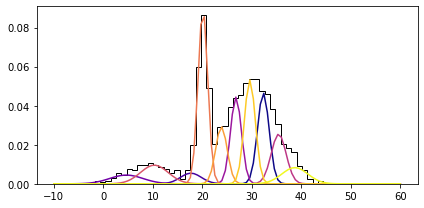

In [6]:
num_gauss = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
x = np.linspace(-10, 60, 100)
colors = plt.cm.plasma(np.linspace(0, 1, 10))
aic_values = []

for n in num_gauss:
        
    gm = GaussianMixture(n_components=n, covariance_type='diag', random_state=42)
    f = gm.fit(data)
    
    aic = gm.aic(data)
    aic_values.append(aic)

    means = f.means_
    covariances = f.covariances_
    variances = np.sqrt(covariances)
    weights = f.weights_
    
    plt.figure(figsize=(6, 3))
    plt.hist(data, bins=50, histtype='step', color='black', density=True)
    
    for i in range(n):
        gi = norm(loc=means[i], scale=variances[i]).pdf(x)
        plt.plot(x, gi*weights[i], color=colors[i])
        
plt.tight_layout() 
plt.show()    

For each of this fits, compute the AIC (easy! It's a attribute of the trained model!). Plot $N$ vs AIC: which model is preferred?

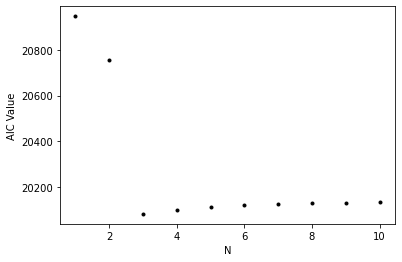

The lower AIC value corresponds to the best fitting model, therefore the 3-gaussian model is the one that fits better the data.


In [11]:
plt.scatter(num_gauss, aic_values, marker='.', color='black')
plt.xlabel('N')
plt.ylabel('AIC Value')
plt.show()
print('The lower AIC value corresponds to the best fitting model, therefore the 3-gaussian model is the one that fits better the data.')
#i notice that the minimum aic value is corresponding to 3 gaussian-fit!

Plot the preferred solution on top of the input data. You should get a very nice fit!

In [13]:
x = np.linspace(-10, 60, 100) # fai il reshape (-1, 1)
n_gauss = 3
gm = GaussianMixture(n_components=n_gauss, covariance_type='diag', max_iter=100, random_state=42)
fit = gm.fit(data)

means = fit.means_
covariances = fit.covariances_
variances = np.sqrt(covariances)
weights = fit.weights_

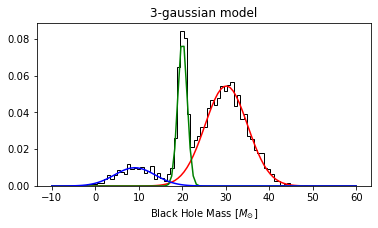

In [37]:
g1 = norm(loc=means[0], scale=variances[0]).pdf(x)
g2 = norm(loc=means[1], scale=variances[1]).pdf(x)
g3 = norm(loc=means[2], scale=variances[2]).pdf(x)

plt.figure(figsize=(6, 3))
plt.hist(data, bins=70, histtype='step', color='black', density=True)
plt.plot(x, g1*weights[0], 'red')
plt.plot(x, g2*weights[1], 'green')
plt.plot(x, g3*weights[2], 'blue')
plt.xlabel('Black Hole Mass [$M_{\odot}$]')
plt.title('3-gaussian model')
plt.show()

Text(0.5, 0, 'Black hole mass $[M_\\odot]$')

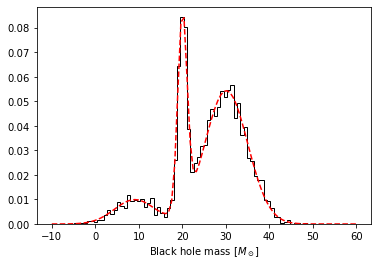

In [38]:
x = np.linspace(-10, 60, 100)
logprob = gm.score_samples(x.reshape(-1, 1))
pdf = np.exp(logprob)

plt.hist(data, 70, density=True, histtype='step', color='black')

plt.plot(x, pdf, linestyle='dashed', color='red')

plt.xlabel("Black hole mass $[M_\odot]$")

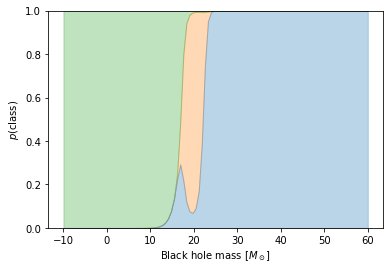

In [42]:
dens = gm.predict_proba(x.reshape(-1, 1))
dens = dens.cumsum(axis=1).T

plt.fill_between(x, dens[0], dens[1], color='C1', alpha=0.3)
plt.fill_between(x, dens[1], 1, color='C2', alpha=0.3)
plt.fill_between(x, 0, dens[0], color='C0', alpha=0.3)

plt.ylim(0, 1)
plt.xlabel("Black hole mass $[M_\odot]$")

plt.ylabel(r'$p({\rm class})$');